In [1]:
import cv2
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

In [2]:
imglist=listdir('./train')
img=[]
for file in imglist:
    if "jpg" in file:
        img.append(file)
imglist=img

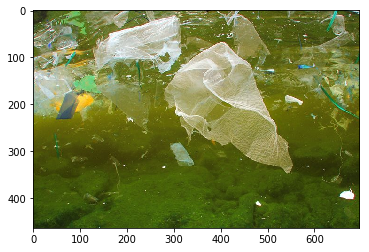

In [7]:
# read img
img=cv2.imread(join('train',imglist[2])) # color로 읽어오기
plt.imshow(img)

### blur 

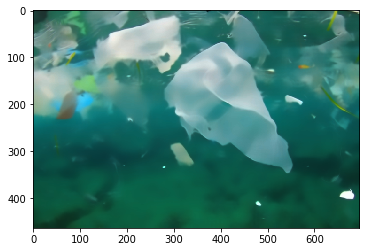

In [9]:
# blur

h=20
hColor=10
# Default values
templateWindowSize = 7
searchWindowSize = 21
    
blur = cv2.fastNlMeansDenoisingColored(img, None,h,hColor,templateWindowSize,searchWindowSize)
    
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

## Erosion

![image](https://opencv-python.readthedocs.io/en/latest/_images/image01.png)
 
- pixel에 structuring element를 적용하여, 하나라도 0이 있으면 대상 pixel을 제거한다
- 작은 object를 제거하는 효과가 있다.

#### cv2.erode(src, kernel, dst, anchor, iterations, borderType, borderValue)

   - src – the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
   - kernel – structuring element. cv2.getStructuringElemet() 함수로 만들 수 있음.
   - anchor – structuring element의 중심. default (-1,-1)로 중심점.
   - iterations – erosion 적용 반복 횟수

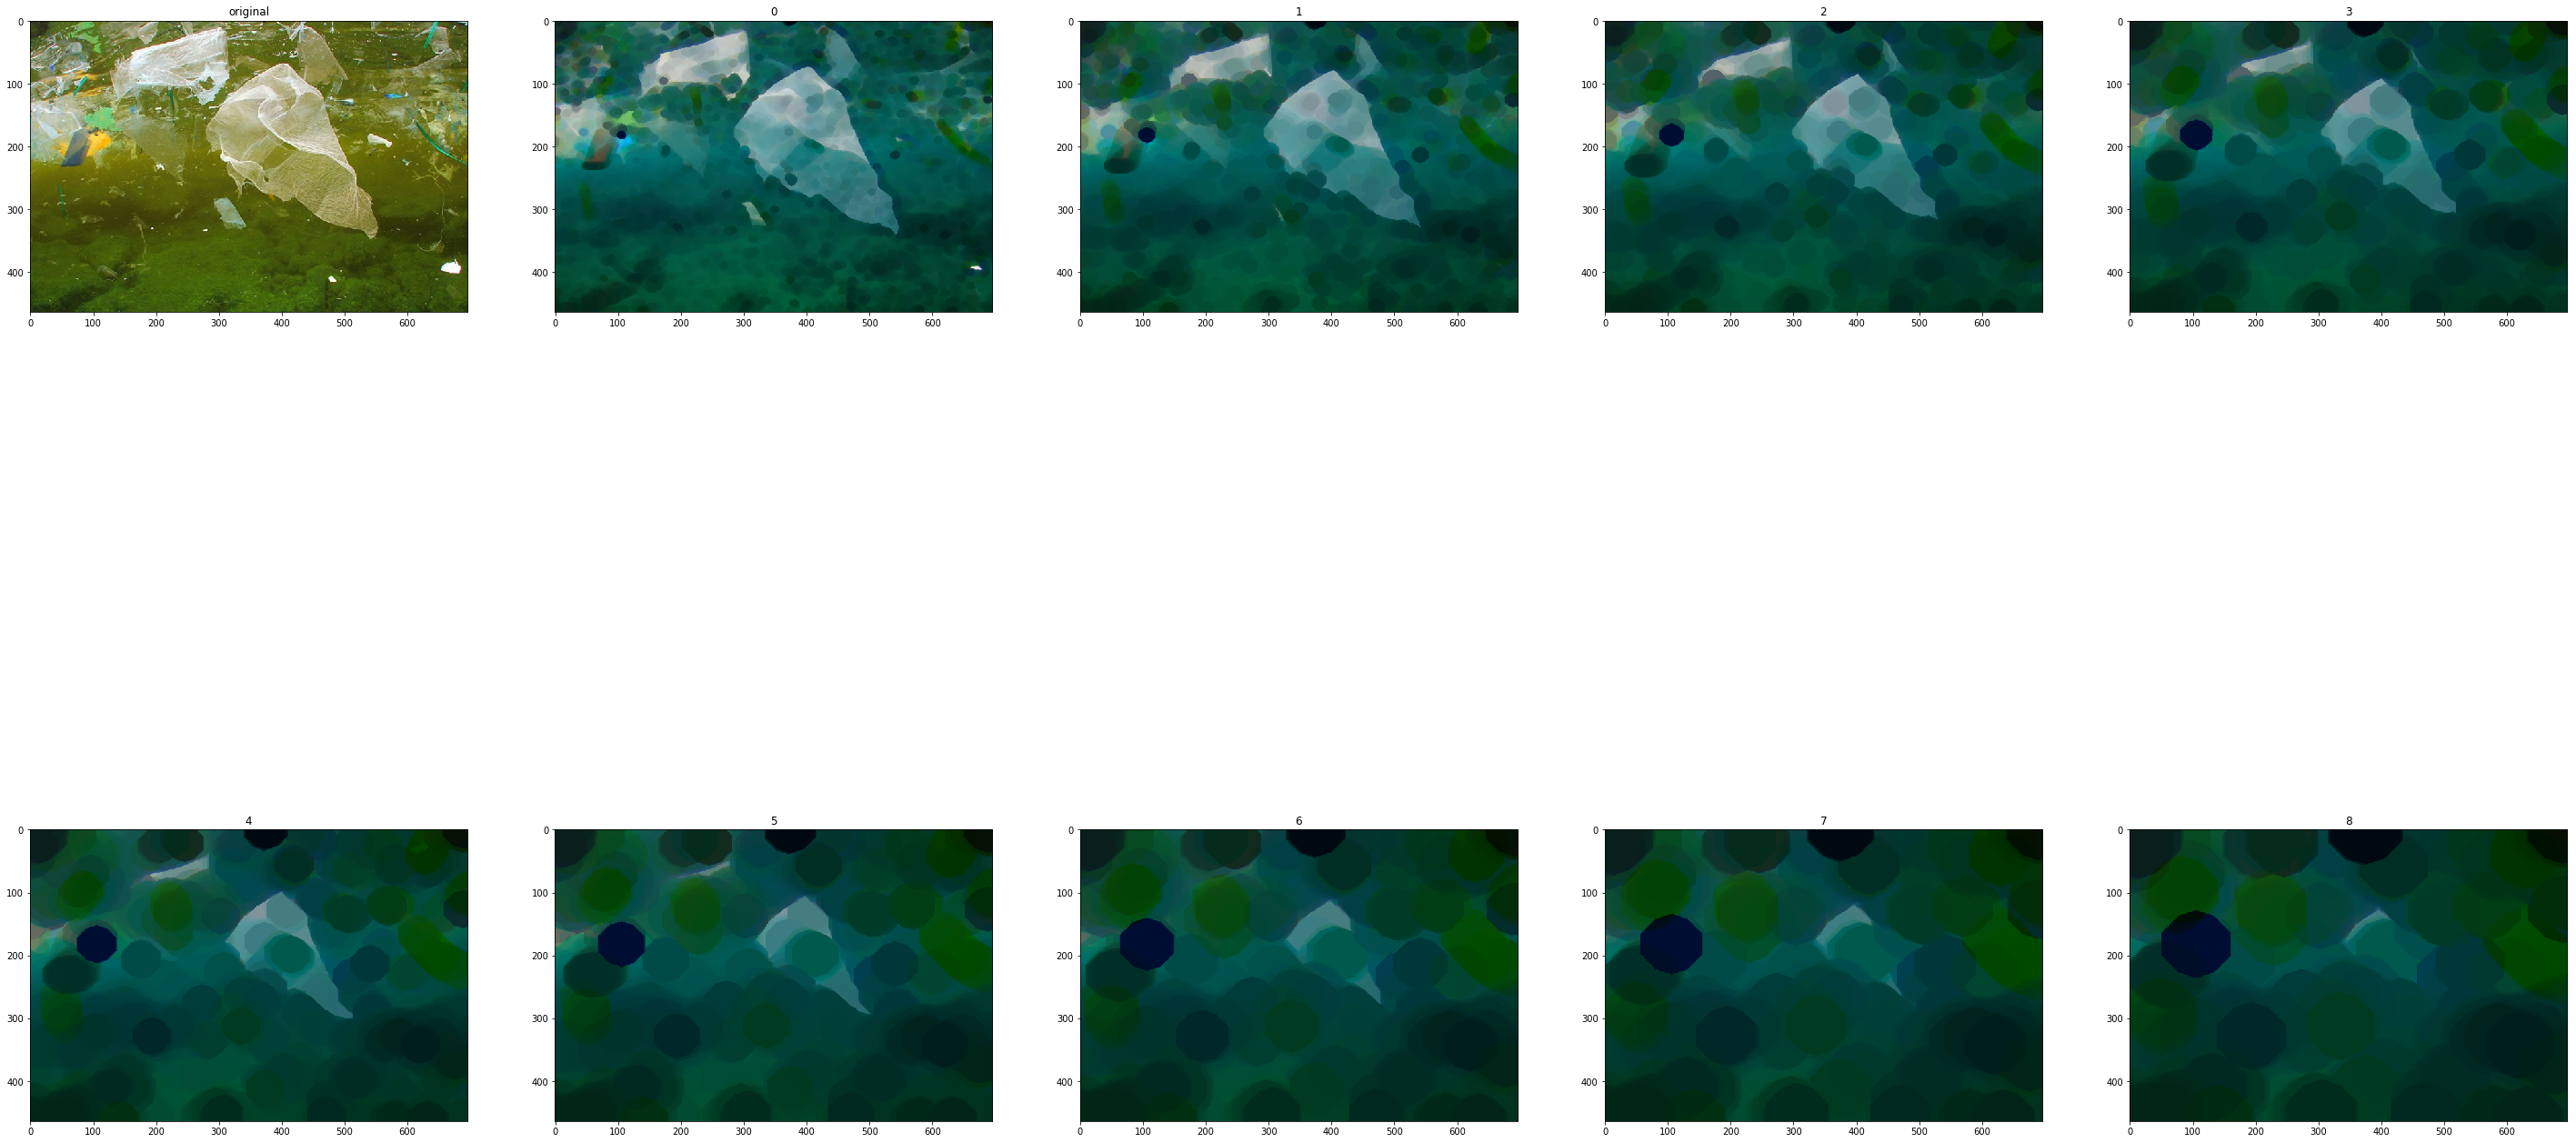

In [18]:
elKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13,13))
gradient=cv2.erode(img,elKernel,iterations=1)




plt.figure(figsize=(50,30))
plt.subplot(2,5,1)
plt.imshow(img)
plt.title("original")
for i in range(9):
    #plt.figure(figsize=(20,10))
    plt.subplot(2,5,i+2)
    gradient=cv2.erode(img,elKernel,iterations=i+1)
    plt.imshow(cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB))
    plt.title(str(i))


plt.show()

## Dilation

![dilation](https://opencv-python.readthedocs.io/en/latest/_images/image03.png)

- 각 pixel에 structuring element를 적용합니다
- 겹치는 부분이 하나라도 있으면, 이미지를 확장한다
- 결과적으로 경계가 부드러워지는 효과를 얻을 수 있다.


#### cv2.dilation(src, kernel, dst, anchor, iterations, borderType, borderValue)


- src – the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
- kernel – structuring element. cv2.getStructuringElemet() 함수로 만들 수 있음.
- anchor – structuring element의 중심. default (-1,-1)로 중심점.
- iterations – dilation 적용 반복 횟수

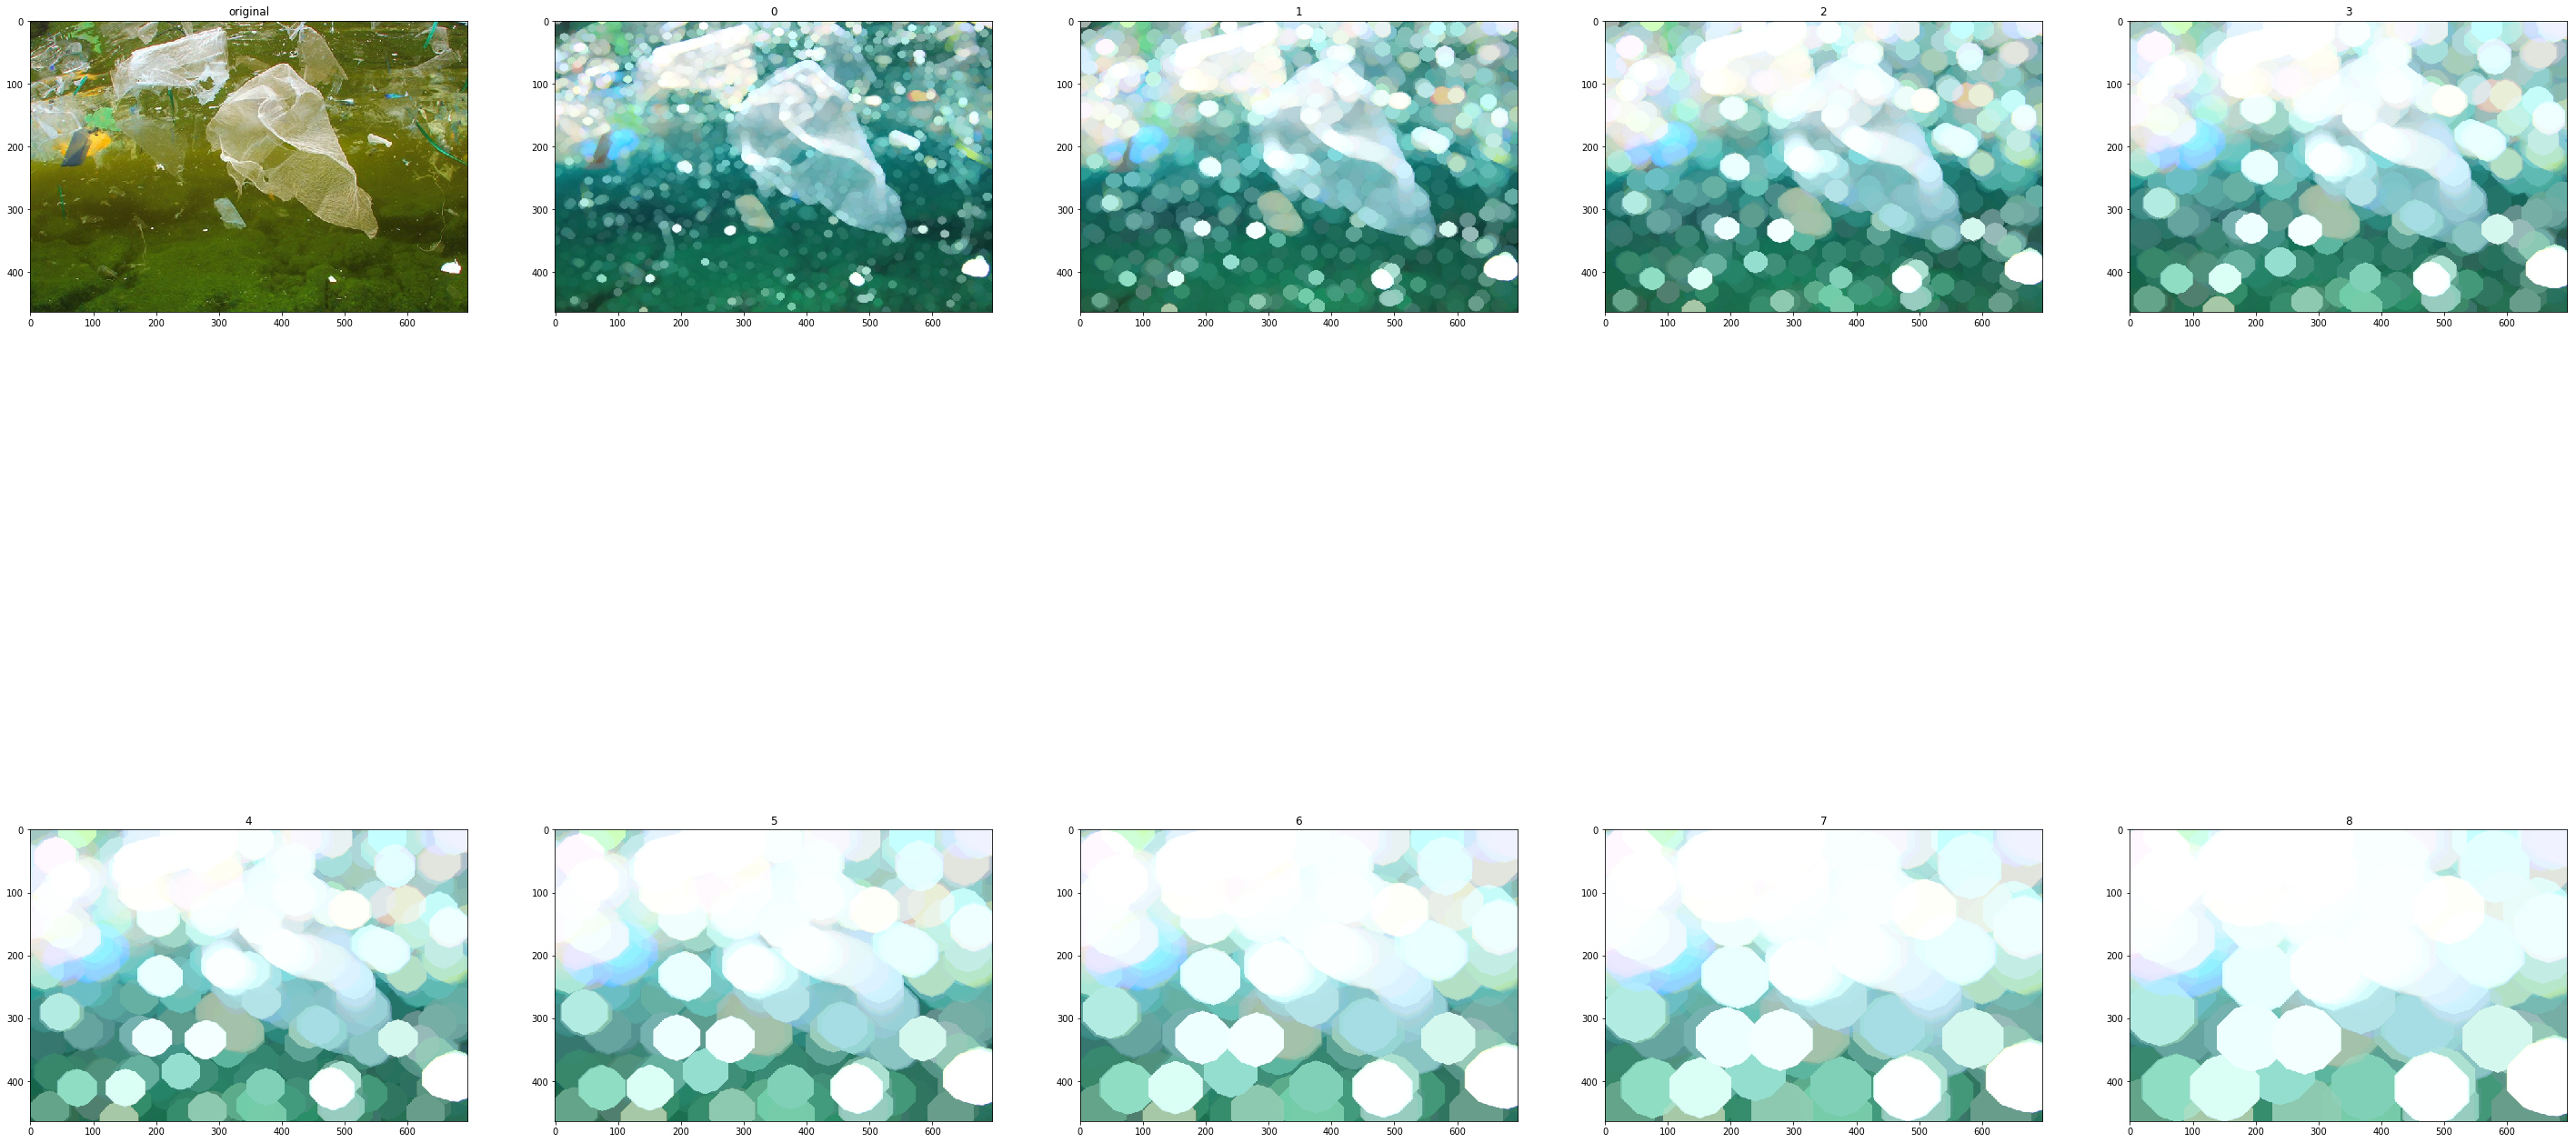

In [20]:
elKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13,13))
gradient=cv2.erode(img,elKernel,iterations=1)




plt.figure(figsize=(50,30))
plt.subplot(2,5,1)
plt.imshow(img)
plt.title("original")
for i in range(9):
    #plt.figure(figsize=(20,10))
    plt.subplot(2,5,i+2)
    gradient=cv2.dilate(img,elKernel,iterations=i+1)
    plt.imshow(cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB))
    plt.title(str(i))


plt.show()

### opening

- Erosion을 적용한 후에 Dilation을 적용
- 작은 object제거에 효과적

### closing

- Dilation을 적용한 후에 Erosion을 적용
- 전체적인 윤곽 파악에 적합


![opening](https://opencv-python.readthedocs.io/en/latest/_images/image05.png)

#### cv2.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]

- src – Source image. The number of channels can be arbitrary. The depth should be one of CV_8U, CV_16U, CV_16S, CV_32F` or ``CV_64F.
- op –
    - Type of a morphological operation that can be one of the following:

    MORPH_OPEN - an opening operation
    MORPH_CLOSE - a closing operation
    MORPH_GRADIENT - a morphological gradient. Dilation과 erosion의 차이.
    MORPH_TOPHAT - “top hat”. Opeining과 원본 이미지의 차이
    MORPH_BLACKHAT - “black hat”. Closing과 원본 이미지의 차이
- kernel – structuring element. cv2.getStructuringElemet() 함수로 만들 수 있음.
- anchor – structuring element의 중심. default (-1,-1)로 중심점.
- iterations – erosion and dilation 적용 횟수
- borderType – Pixel extrapolation method. See borderInterpolate for details.
- borderValue – Border value in case of a constant border. The default value has a - special meaning.

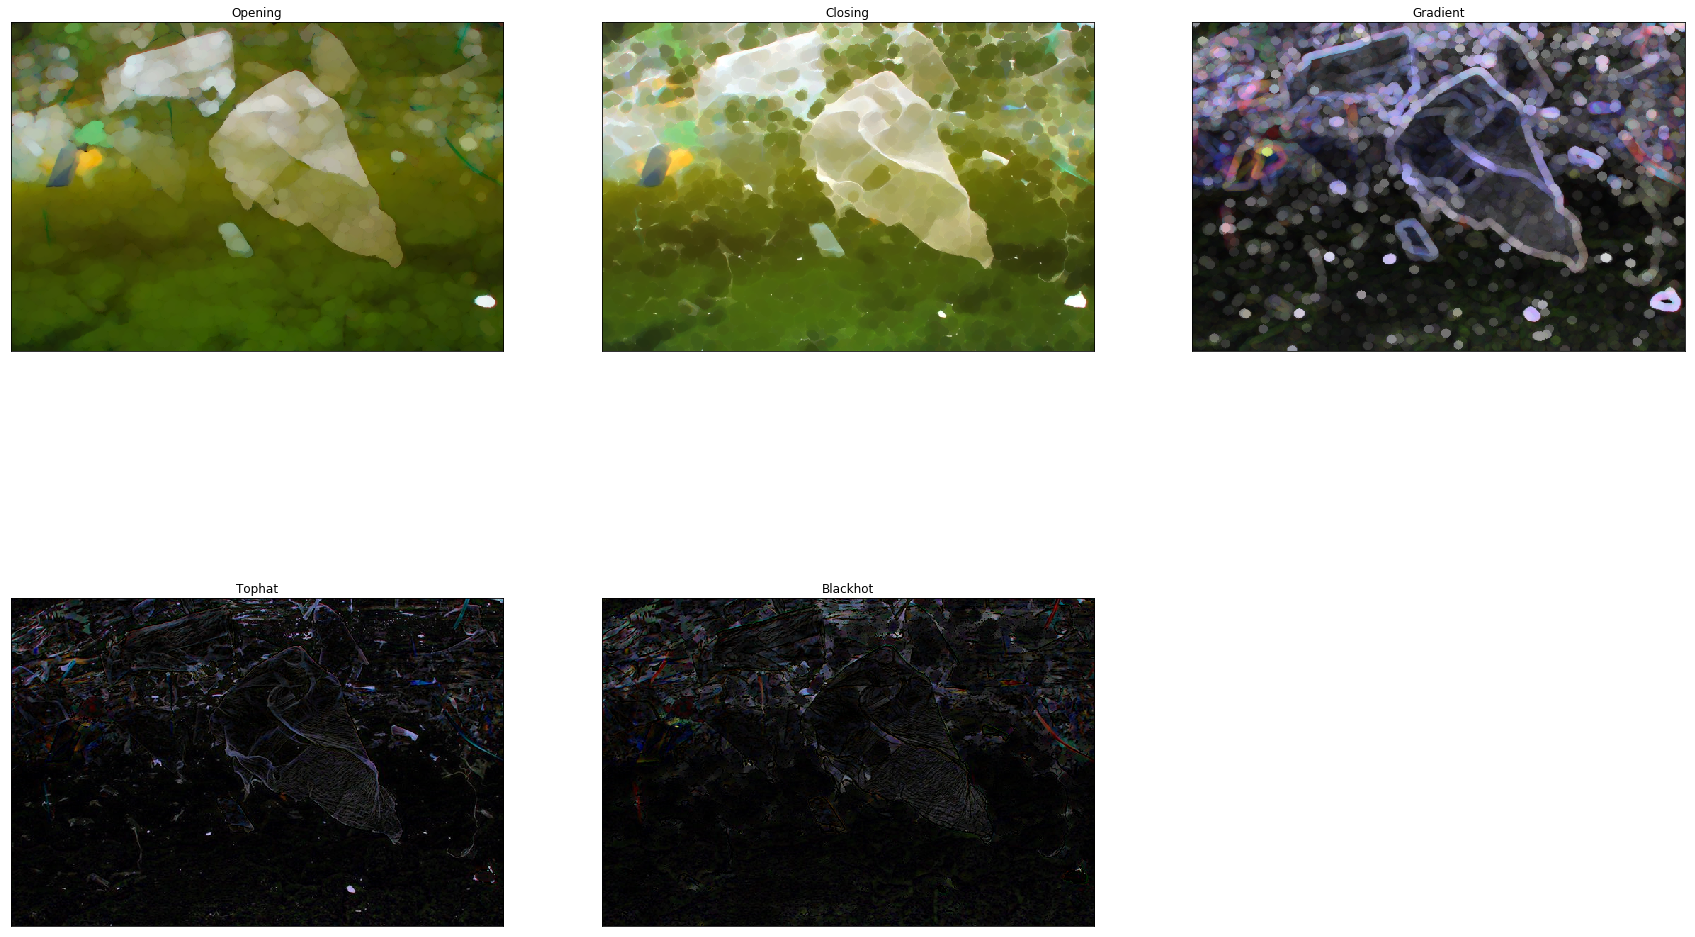

In [32]:
elKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13,13))
opening=cv2.morphologyEx(img,cv2.MORPH_OPEN ,elKernel)
closing=cv2.morphologyEx(img,cv2.MORPH_CLOSE ,elKernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, elKernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, elKernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT,elKernel)


images =[opening,closing,gradient,tophat,blackhat]
titles =['Opening','Closing','Gradient','Tophat','Blackhot']
plt.figure(figsize=(30,30))
for i in range(5):
    plt.subplot(3,3,i+1),plt.imshow(images[i]),plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()